## Tutorial for Supervised and Unsupervised Learning on Simulations of a Retro Aldolase

In this jupyter notebook we will use the model_building.py module to identify differences in the molecular interactions for a retro aldolase when it is in a catatlytically competent state and when it is 


across PTP1B
when the WPD-loop of PTP1B is in the Closed state, versus when the WPD-loop is in the Open state.
This notebook will also cover all the pre- and post-processing steps requireds to prepare, analyse and visualise the results.

The dataset used here is for PTP1B is the same as what we used in the manuscript. 

<center><img src="miscellaneous/TODO.png" alt="Drawing" style="width: 70%" /></center>

In [1]:
import sys # note temporary... 
sys.path.append("..") # note temporary...

from key_interactions_finder import pycontact_processing
from key_interactions_finder import data_preperation
from key_interactions_finder import model_building
from key_interactions_finder import post_proccessing
from key_interactions_finder import pymol_projections

### Step 1. Process PyContact files with the pycontact_processing.py module 

In this section we will work with the PyContact output files generated. 
Here we will merge our seperate runs together and remove any false interactions that can be generated by the PyContact library. 

In [2]:
pycontact_files_horizontal = ["PyContact_Per_Frame_Interactions_Block1.csv", "PyContact_Per_Frame_Interactions_Block2.csv",
                              "PyContact_Per_Frame_Interactions_Block3.csv", "PyContact_Per_Frame_Interactions_Block4.csv",
                              "PyContact_Per_Frame_Interactions_Block5.csv", "PyContact_Per_Frame_Interactions_Block6.csv",
                              "PyContact_Per_Frame_Interactions_Block7.csv", "PyContact_Per_Frame_Interactions_Block8.csv",
                              "PyContact_Per_Frame_Interactions_Block9.csv", "PyContact_Per_Frame_Interactions_Block10.csv",
                              "PyContact_Per_Frame_Interactions_Block11.csv", "PyContact_Per_Frame_Interactions_Block12.csv",
                              "PyContact_Per_Frame_Interactions_Block13.csv", "PyContact_Per_Frame_Interactions_Block14.csv",
                              "PyContact_Per_Frame_Interactions_Block15.csv", "PyContact_Per_Frame_Interactions_Block16.csv",
                              "PyContact_Per_Frame_Interactions_Block17.csv"]

pycontact_dataset = pycontact_processing.PyContactInitializer(
    pycontact_files=pycontact_files_horizontal,
    multiple_files=True,
    merge_files_method="horizontal",  
    remove_false_interactions=True,
    in_dir="datasets/retrol_aldolase_data/",
)

Your PyContact file(s) have been succefully processed.
You have 3056 features and 10000 observations.
The fully processed dataframe is accesible from the '.prepared_df' class attribute.


In [3]:
# As outputted above, we can inspect the newly prepared dataset by accessing the '.prepared_df' class attribute as follows:
pycontact_dataset.prepared_df

,1Pro 140Glu Hbond bb-sc,1Pro 135Ile Hbond bb-bb,1Pro 136Leu Hbond bb-bb,1Pro 113Val Hydrophobic sc-sc,1Pro 12Val Hydrophobic sc-sc,1Pro 137Thr Hbond bb-sc,1Pro 3Tyr Hbond bb-bb,2Arg 137Thr Hbond sc-bb,2Arg 140Glu Hbond bb-sc,2Arg 136Leu Hbond sc-bb,...,242Ile 212Ile Other bb-sc,246Ile 46Ala Other sc-bb,242Ile 234Ser Other sc-bb,244Glu 222Arg Other bb-sc,241Lys 211Gly Other sc-bb,241Lys 71Phe Other bb-sc,246Ile 77Val Other sc-bb,242Ile 237Arg Other sc-bb,245Leu 44Ile Other bb-sc,242Ile 48Ile Other sc-bb
0,10.69070,2.69143,3.20350,3.28620,1.36506,0.74495,0.64727,3.34225,0.87675,9.87756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.47441,3.23497,4.82080,1.07496,0.25386,2.58459,0.45446,2.34583,0.45081,9.17317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.11200,1.66876,1.58322,2.21242,0.02944,1.15886,0.81023,2.03891,0.84995,6.66903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.28064,3.30286,1.54644,0.05986,0.96466,2.25997,0.43410,1.61199,0.36436,7.82080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.54559,2.78183,1.79891,0.27192,0.44629,1.13325,0.74145,0.25292,0.07107,2.40651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.43428,2.87244,0.37792,0.84401,1.36240,0.45684,0.79760,4.82421,0.83238,8.17372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,7.96627,3.38587,0.16006,0.06228,0.51337,4.56594,0.10768,4.04402,0.00000,5.07718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,7.35284,3.23050,0.00974,0.76542,0.93003,0.90531,0.45525,3.65877,0.09956,10.29806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,7.92164,2.47504,0.27218,0.00000,0.10206,2.02611,0.10234,1.57470,0.01281,5.87328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2. Prepare the Dataset for Machine Learning with the data_preperation.py module. 

In this step, we take our processed dataframe and merge our per frame classifications file to it.
We can also optionally perform several forms of filtering to select what types of interactions we
would like to study.  

In [4]:
# First we generate an instance of the SupervisedFeatureData class (because we have per frame class labels).
classifications_file = "datasets/retrol_aldolase_data/4a2s_RA95_5_Classifications.txt"

supervised_dataset = data_preperation.SupervisedFeatureData(
    input_df=pycontact_dataset.prepared_df,
    target_file=classifications_file,
    is_classification=True,
    header_present=True # If your target_file has a header present, set to True.
)

Your PyContact features and target variable have been succesufully merged.
You can access this dataset through the class attribute: '.df_processed'.


In [5]:
# As stated above to access the newly generated dataframe we can use the class attribute as follows
supervised_dataset.df_processed

,Target,1Pro 140Glu Hbond bb-sc,1Pro 135Ile Hbond bb-bb,1Pro 136Leu Hbond bb-bb,1Pro 113Val Hydrophobic sc-sc,1Pro 12Val Hydrophobic sc-sc,1Pro 137Thr Hbond bb-sc,1Pro 3Tyr Hbond bb-bb,2Arg 137Thr Hbond sc-bb,2Arg 140Glu Hbond bb-sc,...,242Ile 212Ile Other bb-sc,246Ile 46Ala Other sc-bb,242Ile 234Ser Other sc-bb,244Glu 222Arg Other bb-sc,241Lys 211Gly Other sc-bb,241Lys 71Phe Other bb-sc,246Ile 77Val Other sc-bb,242Ile 237Arg Other sc-bb,245Leu 44Ile Other bb-sc,242Ile 48Ile Other sc-bb
0,NotCatComp,10.69070,2.69143,3.20350,3.28620,1.36506,0.74495,0.64727,3.34225,0.87675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NotCatComp,11.47441,3.23497,4.82080,1.07496,0.25386,2.58459,0.45446,2.34583,0.45081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NotCatComp,10.11200,1.66876,1.58322,2.21242,0.02944,1.15886,0.81023,2.03891,0.84995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NotCatComp,9.28064,3.30286,1.54644,0.05986,0.96466,2.25997,0.43410,1.61199,0.36436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NotCatComp,8.54559,2.78183,1.79891,0.27192,0.44629,1.13325,0.74145,0.25292,0.07107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CatComp,10.43428,2.87244,0.37792,0.84401,1.36240,0.45684,0.79760,4.82421,0.83238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,CatComp,7.96627,3.38587,0.16006,0.06228,0.51337,4.56594,0.10768,4.04402,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,CatComp,7.35284,3.23050,0.00974,0.76542,0.93003,0.90531,0.45525,3.65877,0.09956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,CatComp,7.92164,2.47504,0.27218,0.00000,0.10206,2.02611,0.10234,1.57470,0.01281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Optional Feature Filtering

In the above dataframe we have 3057 columns (so 3056 features + 1 target). We can take all of these forward for the stastical analysis or we can perform some filtering in advance (the choice is yours). 
There are five built in filtering methods available to you to perform filtering:

1. **filter_by_occupancy(min_occupancy)** - Remove features that have an %occupancy less than the provided cut-off. %Occupancy is the % of frames with a non 0 value, i.e. the interaction is present in that frame.

2. **filter_by_interaction_type(interaction_types_included)** - PyContact defines four types of interactions ("Hbond", "Saltbr", "Hydrophobic", "Other"). You select the interactions your want to include.

3. **filter_by_main_or_side_chain(main_side_chain_types_included)** - PyContact can also define if each interaction is primarily from the backbone or side-chain for each residue. You select the interaction combinations you want to include. Options are: "bb-bb", "sc-sc", "bb-sc", "sc-bb". Where bb = backbone and sc = sidechain.

4. **filter_by_avg_strength(average_strength_cut_off)** - PyContact calculates a per frame contact score/strength for each interaction. You can filter features by the average score. Values below the cut-off are removed. 

5. **filter_by_occupancy_by_class(min_occupancy)** - Special alternative to the the standard filter features by occupancy method. %occupancy is determined for each class (as opposed to whole dataset), meaning only observations from 1 class have to meet the cut-off to keep the feature. Only avaible to datasets with a categorical target variable (classification). 


Finally if at any point in time you want to reset any filtering you've already performed, you can use the following method: 

6. **reset_filtering()** 

In [6]:
# An example of filtering the dataset using the 4 available methods. 

print(f"Number of features before any filtering: {len(supervised_dataset.df_processed.columns)}")

# Features with a %occupancy of less than 25% are removed. 
supervised_dataset.filter_by_occupancy_by_class(min_occupancy=25)
print(f"Number of features after filtering by occupancy: {len(supervised_dataset.df_filtered.columns)}")

# No filtering performed here as all possible combinations are included. 
supervised_dataset.filter_by_interaction_type(
    interaction_types_included=["Hbond", ])  # "Saltbr", "Hydrophobic", "Other" TEMP TODO
print(f"Number of features after NOT filtering by interaction type: {len(supervised_dataset.df_filtered.columns)}")

# No filtering performed here as all possible combinations are included. 
supervised_dataset.filter_by_main_or_side_chain(
    main_side_chain_types_included=["bb-bb", "sc-sc", "bb-sc", "sc-bb"]  
)
print(f"Number of features after NOT filtering by main or side chain: {len(supervised_dataset.df_filtered.columns)}")

# Features with average interaction scores less than 0.5 will be removed. 
supervised_dataset.filter_by_avg_strength(
    average_strength_cut_off=0.5,  
)
print(f"Number of features after filtering by average interaction scores: {len(supervised_dataset.df_filtered.columns)}")

Number of features before any filtering: 3057
Number of features after filtering by occupancy: 1413
Number of features after NOT filtering by interaction type: 796
Number of features after NOT filtering by main or side chain: 796
Number of features after filtering by average interaction scores: 717


Now if we look at the class attributes of our SupervisedFeatureData() instance (we called it: supervised_dataset) using the special "\_\_dict__" method we can see two dataframes we could use in the machine learning to follow. 

In [7]:
supervised_dataset.__dict__.keys()

dict_keys(['input_df', 'is_classification', 'target_file', 'header_present', 'df_processed', 'df_filtered'])

They are: 
- 'df_processed' - The unfiltered dataframe, 3057 features
- 'df_filtered' - The filtered dataframe. Less than 3057 features. 

In the following section we will use the filtered dataframe.

### Step 3. Perform the Machine Learning with the model_building.py module. 

Now we will setup and run the supervised machine learning (ML) on the retro aldolase enzyme. Here we will apply to ML to distinguish between catalytically active and inactive conformations of the enzyme towards catalysis of XXXX. 

Describe the ML in more detail TODO

In [8]:
supervised_dataset.df_filtered["Target"].value_counts()

NotCatComp    5571
CatComp       3840
Neither        589
Name: Target, dtype: int64

In [9]:
# Instantiate the model.
ml_model = model_building.ClassificationModel(
    dataset=supervised_dataset.df_filtered,
    evaluation_split_ratio=0.15,
    classes_to_use=["CatComp", "NotCatComp"], 
    models_to_use=["CatBoost", "XGBoost", "Random_Forest"],
    scaling_method="min_max",
    out_dir="outputs/retro_aldol_ml",
    cross_validation_splits=5, 
    cross_validation_repeats=3,
    search_approach="none",
)


Below is a summary of the machine learning you have planned.
You will use 2-fold cross validation and perform 1 repeats.
You will use up to 717 features to build each model, with 85.0% of your data used for training the model, which is 7999 observations. 
15.0% of your data will be used for evaluating the best models produced by the 2-fold cross validation, which is 1412 observations.
You have selected to build 1 machine learning model(s), with the following hyperparameters: 
 
A XGBoost model, with grid search parameters: 
{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_pa

Now we can go ahead and build the models.
We have one optional parameter in the command below which is to save the models generated. This can be useful if you ever want to back and do the post-processing (described in steps 4 and 5) in the future for instance. 

If you set this to true all the files required will be saved to a folder called "temporary_files" in your current working directory. 

In [10]:

ml_model.build_models(save_models=True)

[14:00:18] WARNING: D:\bld\xgboost-split_1644955327085\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:27] WARNING: D:\bld\xgboost-split_1644955327085\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:00:36] WARNING: D:\bld\xgboost-split_1644955327085\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model saved to disk at: temporary_files/XGBoost_Model.pickle
Model building complete, returning final results with train/test dataset

,model,best_params,best_score,best_standard_deviation
0,XGBoost,{},0.95862,0.00162


With the models now built, we can see the models seem to be quite equally matched in terms of accuracy for the train and test sets. 
We can now evaluate the quality of the models on the validation dataset (also sometimes refered to as the hold-out set).

For each ML model built a pandas dataframe is generated which contains key results on the validation dataset. 
If you are unfamiliar with any of the terms presented below, [feel free to check out this guide from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [11]:
reports = ml_model.evaluate_models()

Returning classification reports for each model inside a single dictionary


In [12]:
reports["XGBoost"]

,precision,recall,f1-score,support
CatComp,0.944444,0.956063,0.950218,569
NotCatComp,0.970096,0.96204,0.966051,843
accuracy,N/A,N/A,0.959632,1412
macro avg,0.95727,0.959052,0.958135,1412
weighted avg,0.959759,0.959632,0.959671,1412


In [ ]:
reports["Random_Forest"]

In [ ]:
reports["CatBoost"]

Another popular way to evaluate model quality is to generate confusion matrices. 
Using the below command we can generate confusion matrices (stored as numpy arrays) for each model we generated. 

You can then easily plot these confusion matrices in whatever graphing program you like. In this case, I will use seaborn.

In [13]:
confusion_matrices = ml_model.generate_confusion_matrix()

In [14]:
confusion_matrices["Random_Forest"]

KeyError: 'Random_Forest'

In [16]:
import seaborn as sns
axis_labels = ["NotCatComp", "CatComp"]
ax = sns.heatmap(confusion_matrices["Random_Forest"], annot=True, fmt="d", xticklabels=axis_labels, yticklabels=axis_labels, cmap="Greens")

KeyError: 'Random_Forest'

In [ ]:
ax = sns.heatmap(confusion_matrices["CatBoost"], annot=True, fmt="d", xticklabels=axis_labels, yticklabels=axis_labels, cmap="Greens")

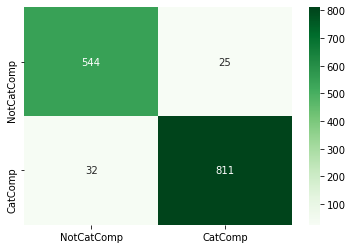

In [18]:
ax = sns.heatmap(confusion_matrices["XGBoost"], annot=True, fmt="d", xticklabels=axis_labels, yticklabels=axis_labels, cmap="Greens")

### Step 4. Work up the Machine Learning with the post_proccessing.py module. 

With this module, we can analyse our results in more detail to understand what features each model determined where important for distignugshing between each state. 

In order to perform the analysis we will need to load in the models previously generated. 

In [19]:
# First we will make an instance of the SupervisedPostProcessor class.
post_proc = post_proccessing.SupervisedPostProcessor(
    out_dir="outputs/retro_aldol_ml",
)

# Option 1 - Load models from the instance of the SupervisedModel class. 
post_proc.load_models_from_instance(supervised_model=ml_model)

# Option 2 - Load models from disk.
#post_proc.load_models_from_disk(models_to_use=["CatBoost", "Random_Forest"]) 

In [20]:
# After preparing the class we can now determine the feature importances for each model.
post_proc.get_feature_importance()

outputs/retro_aldol_ml/XGBoost_Feature_Importances.csv written to disk.
All feature importances written to disk.


In [21]:
# We can also project these per feature importances onto the per-residue level. 
# This is done by summing each residues features importances and normalising so that the residue
#  with the greatest overall  
post_proc.get_per_res_importance()

outputs/retro_aldol_ml/XGBoost_Per_Residue_Importances.csv written to disk.
All per residue feature importance scores were saved to disk.


In [22]:
# Again, if we take a look at the class attributes we can see the per feature and 
# per residue importances were not just saved to disk, but are also now stored in the class
# meaning you can analyse them here if you wish. 
print(post_proc.__dict__.keys())
all_per_res_scores = post_proc.all_per_residue_scores
all_feature_scores = post_proc.all_feature_importances

dict_keys(['out_dir', 'feat_names', 'best_models', 'all_feature_importances', 'all_per_residue_scores'])


### Step 5. Projecting the Results onto Protein Structures with the pymol_projections.py module. 
 
Naturally, we may want to visualise some of the results we have generated above onto a protein structure. We can take advantage of the functions provided in the pymol_projections.py module to do this. 

As the name suggests this will output [PyMOL](https://pymol.org/) compatible python scripts which can be run to represent the results at either the: 

1. Per feature level. (Cylinders are drawn between both residues in each feature, with the cylinder radii marking how large the relative importance is. 
2. Per residue level. The carbon alpha of each residue will be depicted as a sphere, with the sphere radii depicting the relative importance of the residue for the machine learning model.

In [ ]:
pymol_projections.project_multiple_per_res_scores(
    all_per_res_scores=all_per_res_scores,
    out_dir="outputs/retro_aldol_ml"
)

In [ ]:
pymol_projections.project_multiple_per_feature_scores(
    all_feature_scores=all_feature_scores,
    numb_features="all",
    out_dir="outputs/retro_aldol_ml"
)

In [ ]:
# TODO ADD Picture of the outputs here as an example. 